In [ ]:
# Data preprocessing or mainly data cleaning for furhter processes

In [44]:
# The main aim of the model is to predict the career growths and upcoming economic crisises. So data is maintained much precisely.
import numpy as np
import pandas as pd

df=pd.read_csv("adult.data")
print(df.dtypes)
print(df.info())
print(df.describe())

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male        

In [45]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
df = pd.read_csv("adult.data", names=column_names, header=None) # because the data currently has no columns bcs its a .data file instead of a .csv file.

print(df.dtypes)
print(df.info())
print(df.describe())

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex          

In [46]:
# Removing null rows to reduce load on computing
df.dropna(subset=["income"], inplace = True)
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [47]:
# To remove possibilities of lotteries, heriditary wealth, etc.
Q1 = df["capital_gain"].quantile(0.25)
Q3 = df["capital_gain"].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df = df[df["capital_gain"] <= u_limit]
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  29849.000000  2.984900e+04   29849.000000       29849.0  29849.000000   
mean      38.087876  1.899326e+05       9.991155           0.0     95.236021   
std       13.566498  1.057455e+05       2.545549           0.0    419.970367   
min       17.000000  1.228500e+04       1.000000           0.0      0.000000   
25%       27.000000  1.177980e+05       9.000000           0.0      0.000000   
50%       36.000000  1.786440e+05      10.000000           0.0      0.000000   
75%       47.000000  2.371410e+05      12.000000           0.0      0.000000   
max       90.000000  1.484705e+06      16.000000           0.0   4356.000000   

       hours_per_week  
count    29849.000000  
mean        40.158263  
std         12.322335  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [48]:
# To remove possibilities of wealth loss due to disaster, accidents, personal health issues, etc.
Q1 = df["capital_loss"].quantile(0.25)
Q3 = df["capital_loss"].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df = df[df["capital_loss"] <= u_limit]
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  28330.000000  2.833000e+04   28330.000000       28330.0       28330.0   
mean      37.894317  1.901707e+05       9.938722           0.0           0.0   
std       13.588255  1.061599e+05       2.527044           0.0           0.0   
min       17.000000  1.228500e+04       1.000000           0.0           0.0   
25%       27.000000  1.177790e+05       9.000000           0.0           0.0   
50%       36.000000  1.788545e+05      10.000000           0.0           0.0   
75%       47.000000  2.376405e+05      12.000000           0.0           0.0   
max       90.000000  1.484705e+06      16.000000           0.0           0.0   

       hours_per_week  
count    28330.000000  
mean        39.992340  
std         12.304598  
min          1.000000  
25%         39.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [49]:
# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Calculating skewness
skewness = numerical_cols.skew()
print(skewness)

# Identifying highly skewed columns (threshold: absolute skewness > 0.75)
skewed_cols = skewness[abs(skewness) > 0.75].index
print(f"Skewed Columns: {list(skewed_cols)}")

age               0.596681
fnlwgt            1.465137
education_num    -0.335779
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.227554
dtype: float64
Skewed Columns: ['fnlwgt']


In [ ]:
# From the data, we get a clear idea of income can be used to predict the current jobs with high demand and wealth gain & loss can be used to predict the demanded jobs in the future.

In [ ]:
# EDA (Explorative Data Analysis)

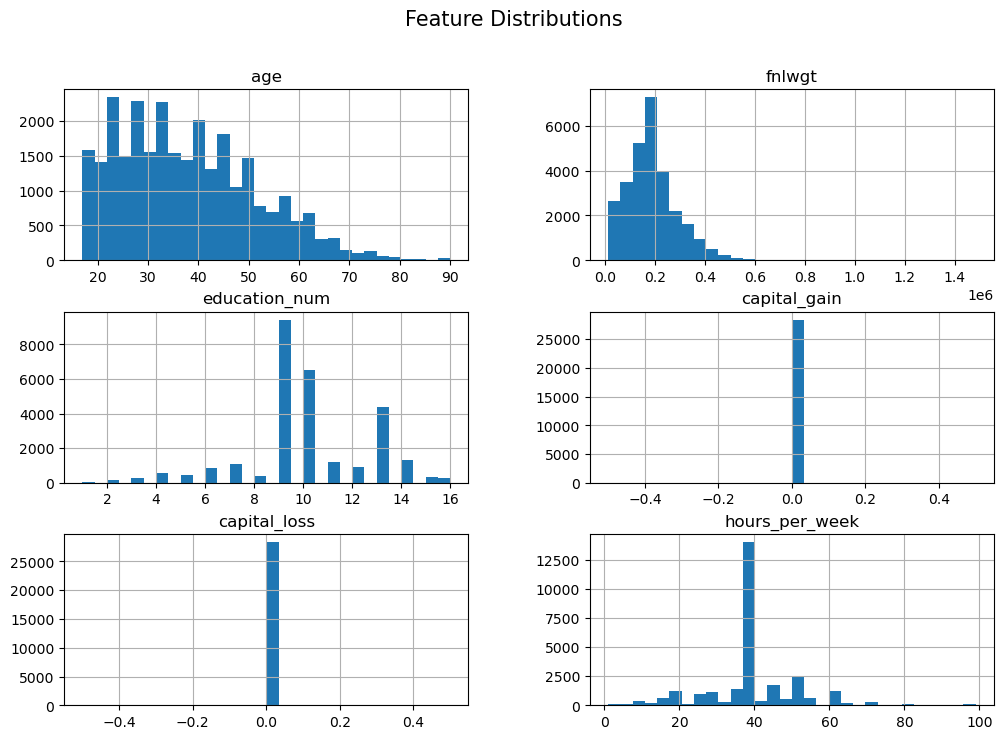

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

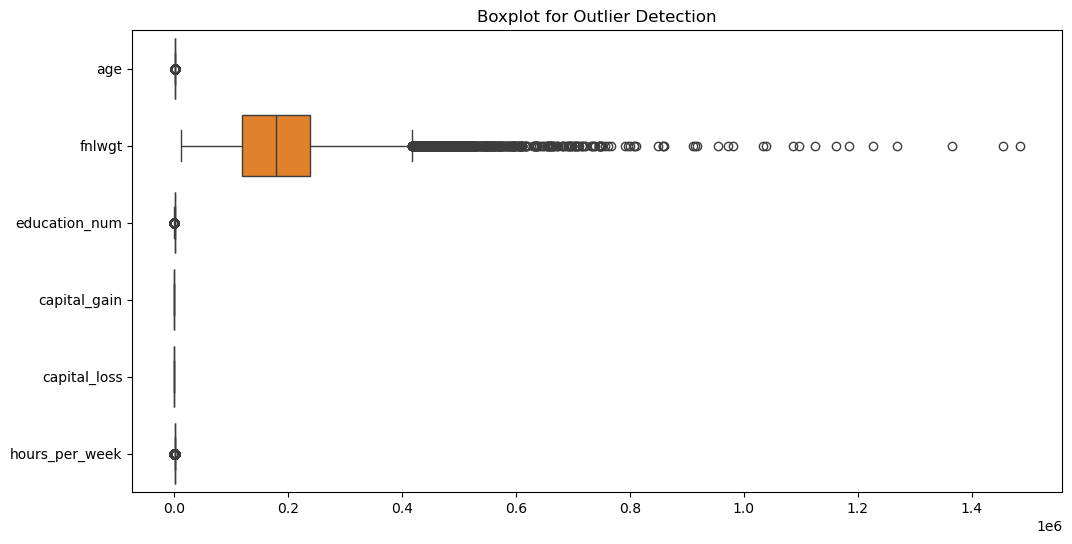

In [51]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

/tmp/ipykernel_126406/4231125557.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["hours_per_week"], shade=True)


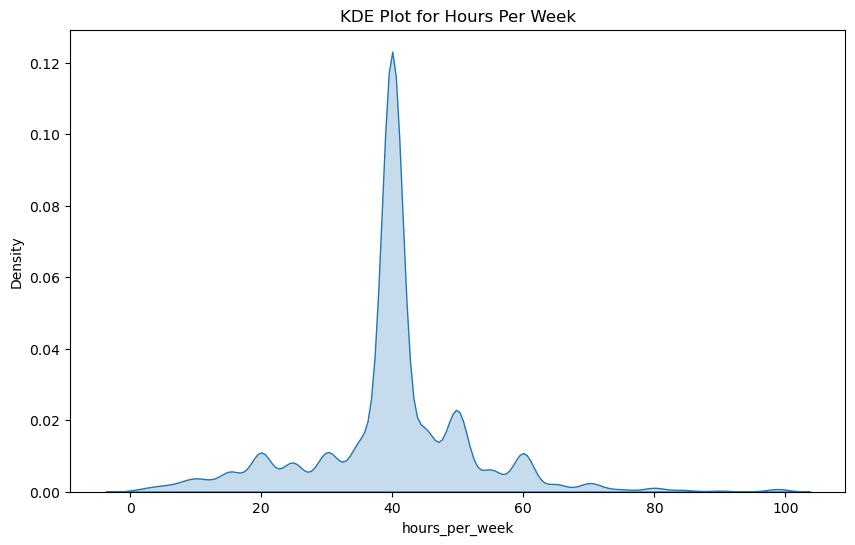

In [52]:
# Kernel density estimation (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(df["hours_per_week"], shade=True)
plt.title("KDE Plot for Hours Per Week")
plt.show()

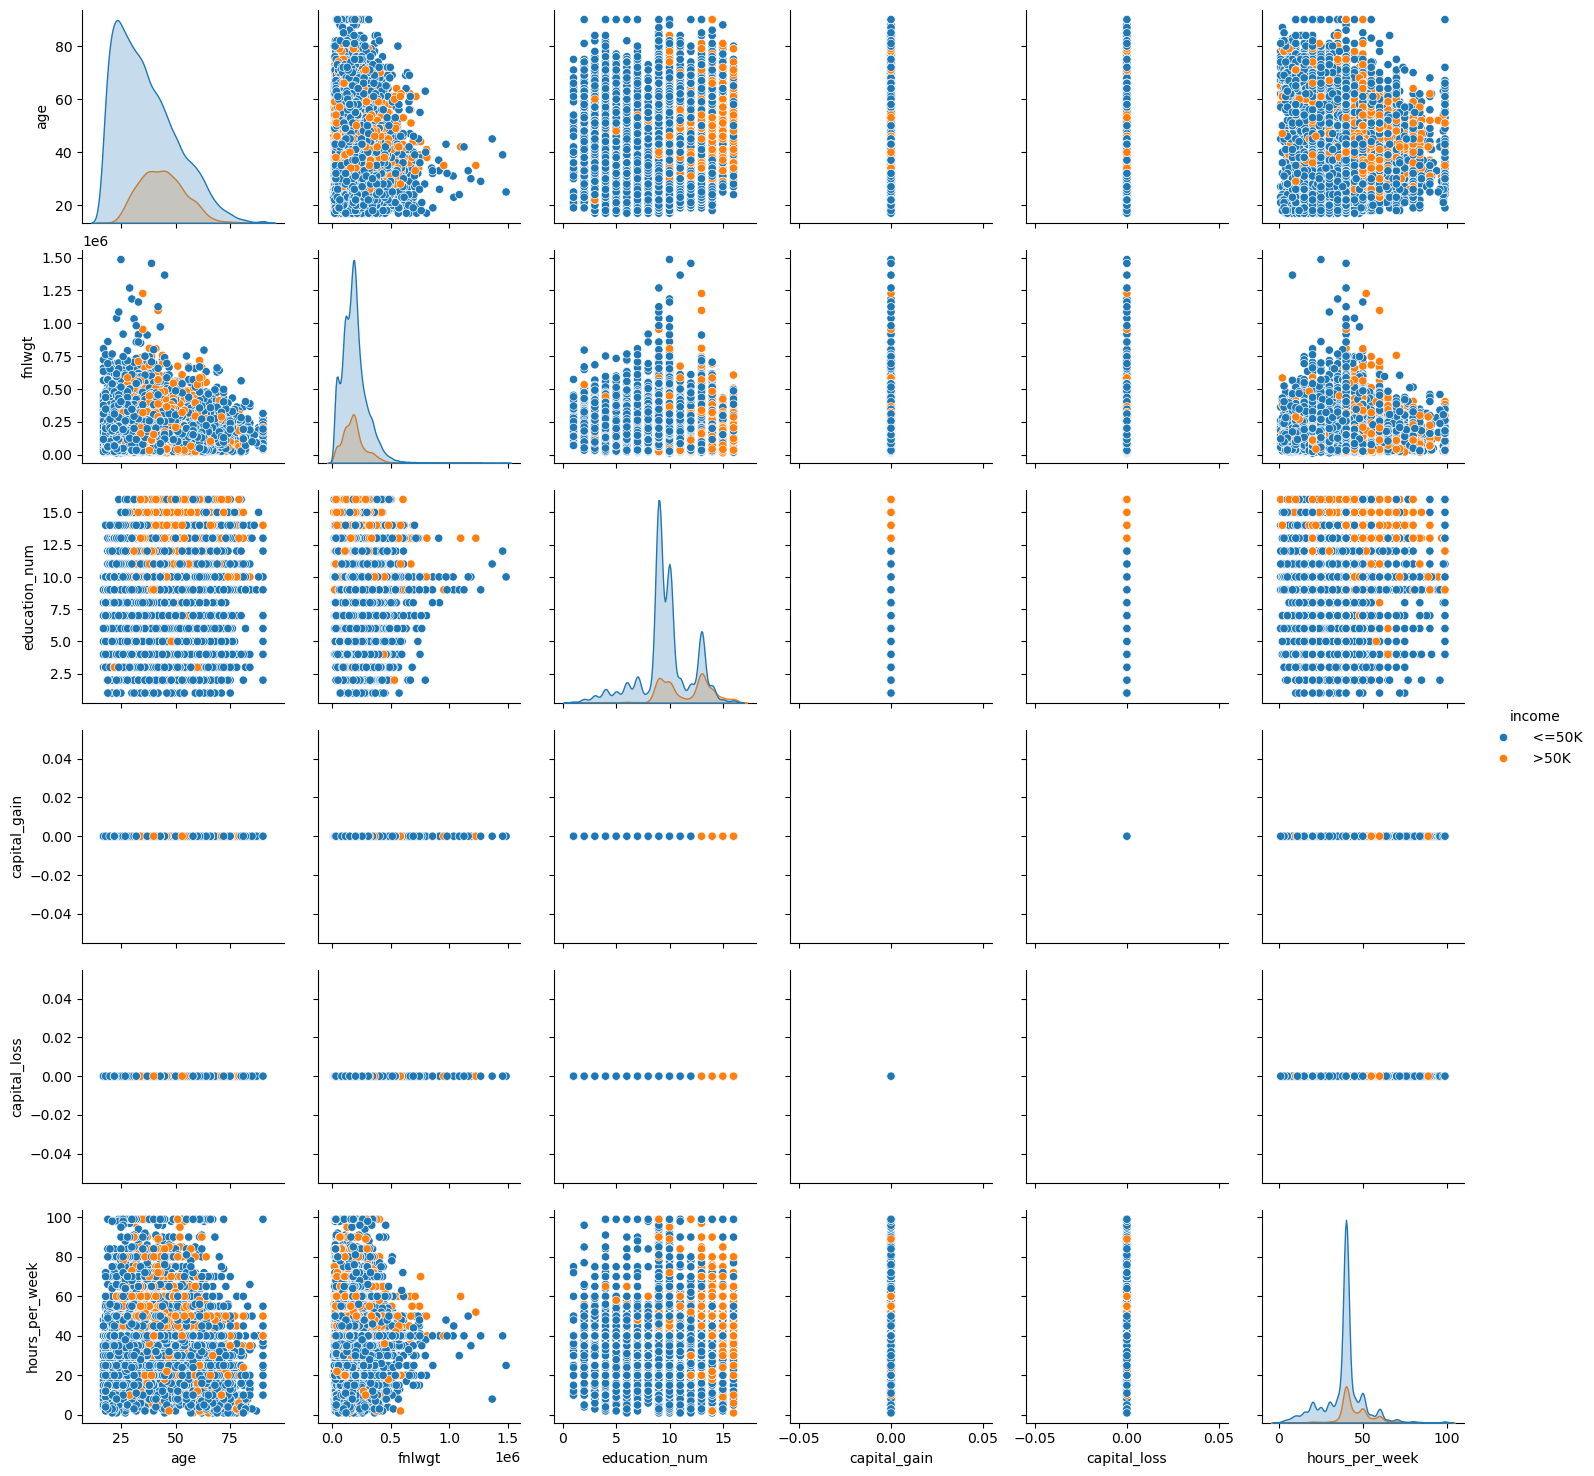

In [53]:
sns.pairplot(df, hue="income", diag_kind="kde")
plt.show()

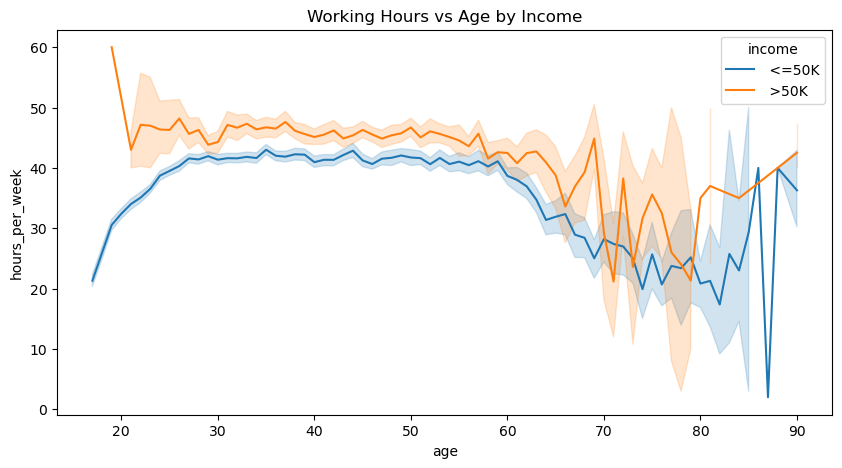

In [54]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="age", y="hours_per_week", hue="income")
plt.title("Working Hours vs Age by Income")
plt.show()

In [ ]:
# Encoding categorical features to numerical values.

In [55]:
# Checking unique values for each column
print(df.nunique())

# Separating categorical & numerical features
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


age                  73
workclass             9
fnlwgt            19709
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain          1
capital_loss          1
hours_per_week       94
native_country       41
income                2
dtype: int64
Categorical Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Numerical Features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["income"] = le.fit_transform(df["income"])
print(df.head())
print(df.dtypes)

   age          workclass  fnlwgt   education  education_num  \
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
5   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
1             0             0              13   United-States       

In [ ]:
# Selecting features

In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Creating the target variable: Career growth based on capital gain
df["career_growth"] = (df["capital_gain"].shift(-1) > df["capital_gain"]).astype(int)
df = df.dropna()  # Remove missing values

# Convert categorical features to numeric
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding

# Features: Remove target and original capital_gain
X = df.drop(columns=["career_growth", "capital_gain"])
y = df["career_growth"]

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Check feature importance
feature_importance = rf.feature_importances_
important_features = np.argsort(feature_importance)[::-1]

for i in important_features:
    print(f"{X.columns[i]}: {feature_importance[i]:.4f}")


native_country_ Yugoslavia: 0.0000
education_ HS-grad: 0.0000
education_ Preschool: 0.0000
education_ Prof-school: 0.0000
education_ Some-college: 0.0000
marital_status_ Married-AF-spouse: 0.0000
marital_status_ Married-civ-spouse: 0.0000
marital_status_ Married-spouse-absent: 0.0000
marital_status_ Never-married: 0.0000
marital_status_ Separated: 0.0000
marital_status_ Widowed: 0.0000
occupation_ Adm-clerical: 0.0000
occupation_ Armed-Forces: 0.0000
occupation_ Craft-repair: 0.0000
occupation_ Exec-managerial: 0.0000
occupation_ Farming-fishing: 0.0000
occupation_ Handlers-cleaners: 0.0000
occupation_ Machine-op-inspct: 0.0000
occupation_ Other-service: 0.0000
occupation_ Priv-house-serv: 0.0000
occupation_ Prof-specialty: 0.0000
occupation_ Protective-serv: 0.0000
occupation_ Sales: 0.0000
education_ Masters: 0.0000
education_ Doctorate: 0.0000
occupation_ Transport-moving: 0.0000
education_ Bachelors: 0.0000
fnlwgt: 0.0000
education_num: 0.0000
capital_loss: 0.0000
hours_per_week: 0

In [61]:
from sklearn.feature_selection import SelectKBest, f_classif

# Applying SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names.
selected_feature_names = X.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['native_country_ Portugal', 'native_country_ Puerto-Rico',
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwan', 'native_country_ Thailand',
       'native_country_ Trinadad&Tobago', 'native_country_ United-States',
       'native_country_ Vietnam', 'native_country_ Yugoslavia'],
      dtype='object')


/home/penguin/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


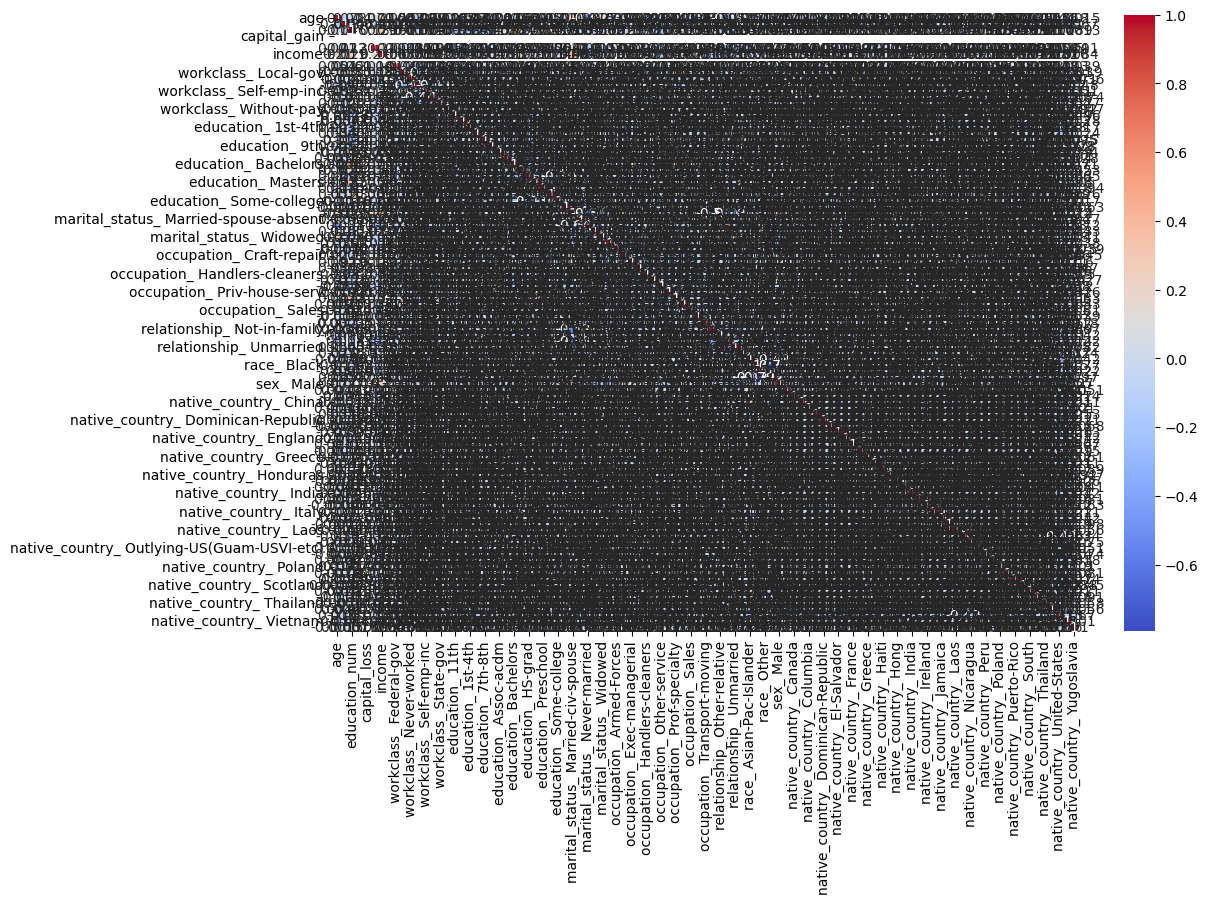

In [62]:
# Check correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
df.drop(columns=["fnlwgt"], inplace=True)

In [64]:
print(df.head())  # Ensure dataset is clean
print("Final feature set:", df.columns.tolist())

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   
5   37  284582             14             0             0              40   

   income  career_growth  workclass_ Federal-gov  workclass_ Local-gov  ...  \
1       0              0                   False                 False  ...   
2       0              0                   False                 False  ...   
3       0              0                   False                 False  ...   
4       0              0                   False                 False  ...   
5       0              0                   False                 False  ...   

   native_country_ Portugal  native_country_ Puerto-Rico  \
1 

In [ ]:
# Removed unwanted columns to reduse overthreading and data leaks.

In [ ]:
# Splitting data into training and testing subsets.

In [65]:
from sklearn.model_selection import train_test_split

# Defining features. { (X) and target (y) }
X = df.drop(columns=["income"])  # Droping target variable
y = df["income"]  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (22664, 100), (22664,)
Testing set: (5666, 100), (5666,)


In [ ]:
# Scaling numeric features (columns with wanted data).

In [66]:
# Standardization (Z-Score Normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Min-Max Scaling (Normalization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Building a robust machine learcning model. Classification is used more than regression here.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [69]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define career growth using current year's data
median_income = df["income"].median()
df["career_growth"] = (df["capital_gain"] > 0) | (df["income"] > median_income)
df["career_growth"] = df["career_growth"].astype(int)  # Convert to binary (1/0)

# Drop missing values
df = df.dropna()

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Features (X) and target (y)
X = df.drop(columns=["career_growth", "income"])  # Drop target & redundant column
y = df["career_growth"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVM & MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Feature Importance (for Tree-based models)
rf = models["Random Forest"]
feature_importance = rf.feature_importances_
important_features = np.argsort(feature_importance)[::-1]

print("Top Features Influencing Career Growth:")
for i in important_features[:10]:  # Show top 10 features
    print(f"{X.columns[i]}: {feature_importance[i]:.4f}")

Random Forest Accuracy: 0.8491
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4575
           1       0.64      0.48      0.55      1091

    accuracy                           0.85      5666
   macro avg       0.76      0.71      0.73      5666
weighted avg       0.84      0.85      0.84      5666

--------------------------------------------------
Gradient Boosting Accuracy: 0.8585
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4575
           1       0.69      0.49      0.57      1091

    accuracy                           0.86      5666
   macro avg       0.79      0.72      0.74      5666
weighted avg       0.85      0.86      0.85      5666

--------------------------------------------------
SVM Accuracy: 0.8503
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4575
           1       0.68      0.42      0.52     

In [ ]:
# Comparing models to find the best one.


Random Forest Model Evaluation:
--------------------------------------------------
Accuracy: 0.8491
Precision: 0.6450
Recall: 0.4812
F1-Score: 0.5512
ROC AUC: 0.8769


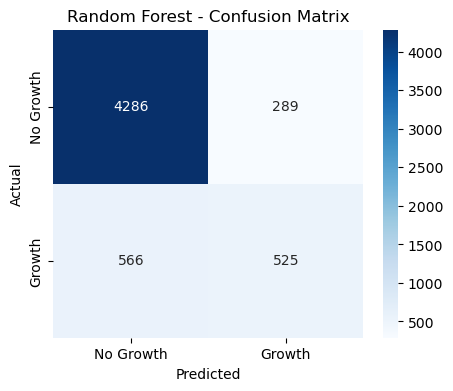


Gradient Boosting Model Evaluation:
--------------------------------------------------
Accuracy: 0.8585
Precision: 0.6865
Recall: 0.4876
F1-Score: 0.5702
ROC AUC: 0.8980


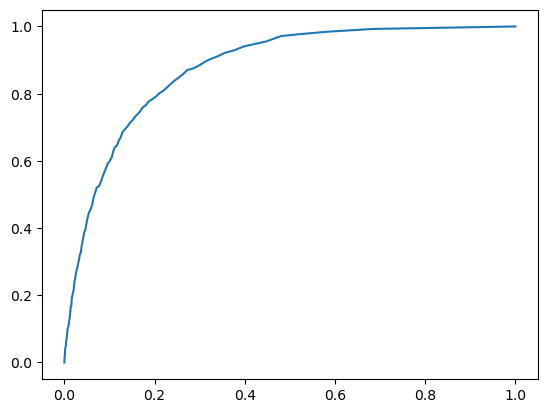

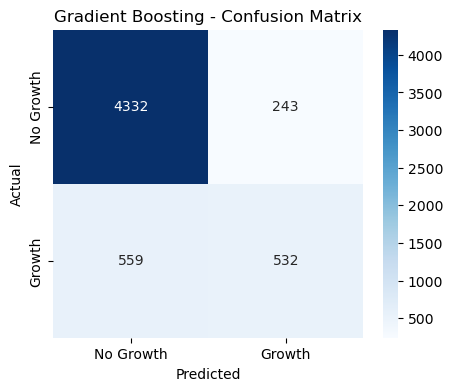


SVM Model Evaluation:
--------------------------------------------------
Accuracy: 0.8503
Precision: 0.6805
Recall: 0.4198
F1-Score: 0.5193
ROC AUC: 0.8676


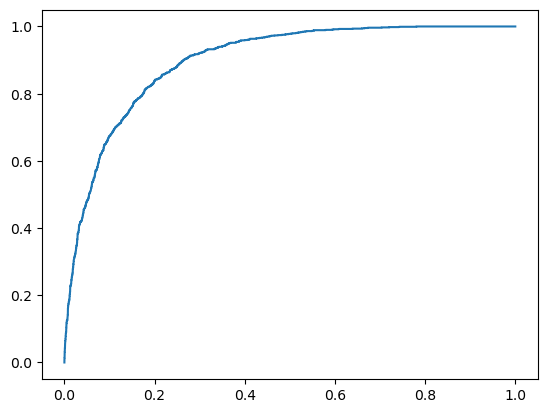

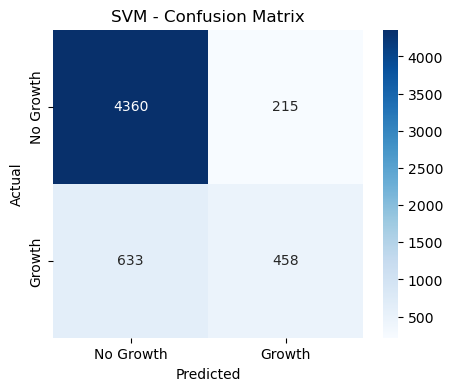


MLP Classifier Model Evaluation:
--------------------------------------------------
Accuracy: 0.8307
Precision: 0.5672
Recall: 0.5105
F1-Score: 0.5374
ROC AUC: 0.8443


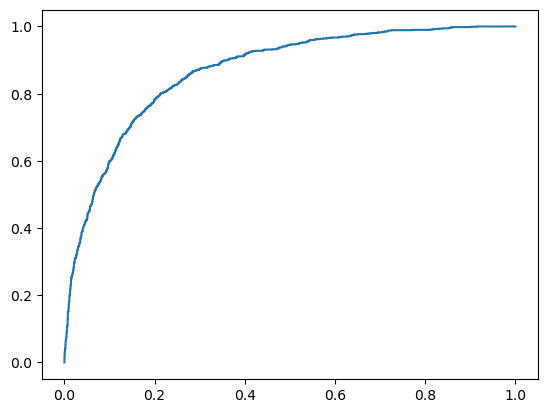

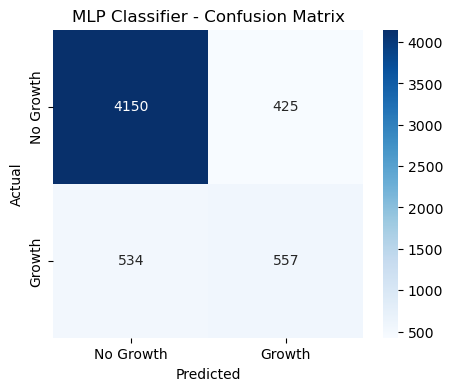


Logistic Regression Model Evaluation:
--------------------------------------------------
Accuracy: 0.8537
Precision: 0.6688
Recall: 0.4757
F1-Score: 0.5560
ROC AUC: 0.8914


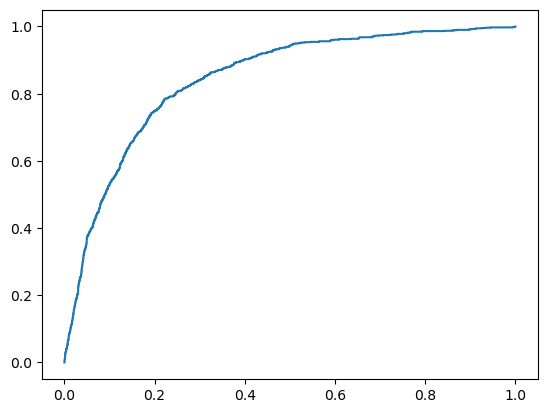

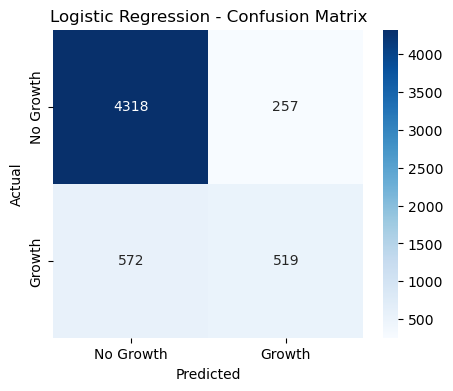

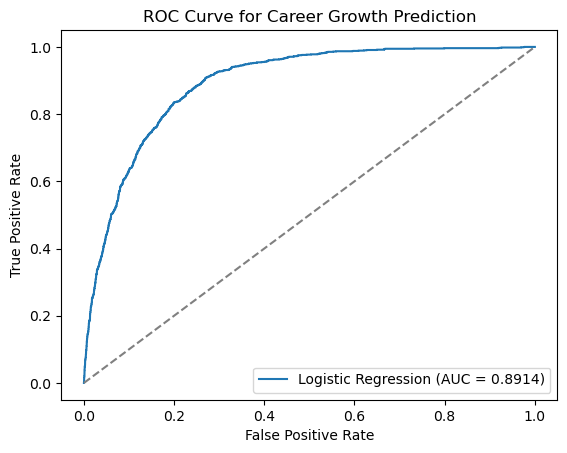


Final Model Comparison:
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Random Forest        0.849100   0.644963  0.481210  0.551181  0.876911
Gradient Boosting    0.858454   0.686452  0.487626  0.570204  0.897968
SVM                  0.850335   0.680535  0.419798  0.519274  0.867626
MLP Classifier       0.830745   0.567210  0.510541  0.537385  0.844306
Logistic Regression  0.853689   0.668814  0.475710  0.555972  0.891385


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score, roc_curve
)

# Store results
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # For ROC
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    
    # Store in dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    }
    
    # Print classification report
    print(f"\n{name} Model Evaluation:")
    print("-" * 50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Growth", "Growth"], yticklabels=["No Growth", "Growth"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    # ROC Curve
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")
        
# Ploting ROC Curve
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Career Growth Prediction")
plt.legend()
plt.show()

# Print summary of model performance
print("\nFinal Model Comparison:")
results_df = pd.DataFrame(results).T
print(results_df)

In [ ]:
# Optimmizing model perfomance by tuning hyperparameters.

In [73]:
# Hyperparameter Tuning & Pipeline.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

pipelines = {
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()),  # Not needed for RF but kept for consistency
        ("classifier", RandomForestClassifier(random_state=42))
    ]),
    "MLP Classifier": Pipeline([
        ("scaler", StandardScaler()),  # MLP needs feature scaling
        ("classifier", MLPClassifier(max_iter=500, random_state=42))
    ])
}

# Hyperparameters for tuning
param_grids = {
    "Random Forest": {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__max_depth": [None, 10, 20],
        "classifier__min_samples_split": [2, 5, 10]
    },
    "MLP Classifier": {
        "classifier__hidden_layer_sizes": [(50,), (100,), (100, 50)],
        "classifier__activation": ["relu", "tanh"],
        "classifier__alpha": [0.0001, 0.001],
    }
}

# Perform GridSearchCV
best_models = {}

for name, pipeline in pipelines.items():
    print(f"\U0001f50d Tuning {name}...")
    
    grid_search = GridSearchCV(
        pipeline, param_grids[name], 
        cv=5, scoring="accuracy", n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    
    # Store best model
    best_models[name] = grid_search.best_estimator_
    
    print(f"✅ Best parameters for {name}: {grid_search.best_params_}")
    print(f"🏆 Best accuracy: {grid_search.best_score_:.4f}\n")

# Evaluate Best Models
from sklearn.metrics import accuracy_score

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"📊 {name} Test Accuracy: {accuracy:.4f}")

🔍 Tuning Random Forest...
✅ Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
🏆 Best accuracy: 0.8560

🔍 Tuning MLP Classifier...


/home/penguin/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/penguin/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/penguin/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/penguin/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/penguin/anaconda3/lib/pyth

✅ Best parameters for MLP Classifier: {'classifier__activation': 'relu', 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (50,)}
🏆 Best accuracy: 0.8373

📊 Random Forest Test Accuracy: 0.8560
📊 MLP Classifier Test Accuracy: 0.8401


In [ ]:
# Saving model.

In [74]:
import joblib

# Save the best Random Forest model
joblib.dump(best_models["Random Forest"], "career_growth_rf.pkl")

# Save the best MLP model
joblib.dump(best_models["MLP Classifier"], "career_growth_mlp.pkl")

print("\u2705 Models saved successfully!")

✅ Models saved successfully!


In [ ]:
# Access the model's perfomance on unseen data.

In [75]:
# Load saved models
rf_model = joblib.load("career_growth_rf.pkl")
mlp_model = joblib.load("career_growth_mlp.pkl")

# Simulate unseen data (new career growth prediction)
unseen_data = X_test[:5]  # Using 5 random test samples as "new data"

# Predictions
rf_predictions = rf_model.predict(unseen_data)
mlp_predictions = mlp_model.predict(unseen_data)

print("📊 Predictions on Unseen Data:")
print(f"Random Forest: {rf_predictions}")
print(f"MLP Classifier: {mlp_predictions}")

📊 Predictions on Unseen Data:
Random Forest: [1 0 0 0 0]
MLP Classifier: [1 0 0 0 0]


In [ ]:
# Conclusions on the created models.

In [76]:
from sklearn.metrics import accuracy_score

# Assume we have ground truth labels for unseen data
true_labels = y_test[:5]  

# Compare predictions
rf_accuracy = accuracy_score(true_labels, rf_predictions)
mlp_accuracy = accuracy_score(true_labels, mlp_predictions)

print(f"\U0001f3c6 Random Forest Accuracy on Unseen Data: {rf_accuracy:.4f}")
print(f"\U0001f3c6 MLP Classifier Accuracy on Unseen Data: {mlp_accuracy:.4f}")

🏆 Random Forest Accuracy on Unseen Data: 0.8000
🏆 MLP Classifier Accuracy on Unseen Data: 0.8000
